Input your chosen data set and also all the commands needed for your code

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
import plotly.express as px
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

df = pd.read_csv('Marvel_Comics.csv')
df

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),-2016,A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free
1,A Year of Marvels: August Infinite Comic (2016),-2016,A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free
2,A Year of Marvels: February Infinite Comic (2016),-2016,A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free
3,A Year of Marvels: July Infinite Comic (2016),-2016,A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free
4,A Year of Marvels: June Infinite Comic (2016),-2016,A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free
...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),-2019,Ziggy Pig - Silly Seal Comics (2019) #1,"March 06, 2019",NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,$3.99
34988,Zombie (2006),-2006,Zombie (2006) #4,"December 20, 2006",With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99
34989,Zombie (2006),-2006,Zombie (2006) #3,"November 29, 2006",The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99
34990,Zombie (2006),-2006,Zombie (2006) #2,"October 25, 2006","For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99


Clean and organize your dataset

In [12]:
df[['date', 'year']] = df['publish_date'].str.split(', ', expand=True)
new_df = df.drop(['active_years', 'publish_date'], axis=1)

mask = (new_df['year'] == '-0001') | (new_df['year'] == '2029')
new_df['year'][mask] = df['issue_title'][mask]
new_df[['delete', 'year2']] = new_df['year'][mask].str.split('(', expand=True)
new_df = new_df.drop(['delete'], axis=1)
new_df[['year3', 'delete']] = new_df['year2'][mask].str.split(')', expand=True)
new_df['year'][mask] = new_df['year3'][mask]
new_df = new_df.drop(['delete', 'year2', 'year3'], axis=1)

mask = (new_df['year'] == 'Hardcover') | (new_df['year'] == None) | (new_df['year'] == 'Digest') | (new_df['year'] == 'Trade Paperback')
new_df['year'][mask] = np.nan

new_df['Price'][new_df['Price'] == ' Free'] = ' $Free'
new_df['Price'][new_df['Price'] == 'None'] = np.nan

new_df[['sign', 'price($)']] = new_df['Price'].str.split('$', expand=True)
new_df = new_df.drop(['Price', 'sign'], axis=1)
new_df

,comic_name,issue_title,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,date,year,price($)
0,A Year of Marvels: April Infinite Comic (2016),A Year of Marvels: April Infinite Comic (2016) #1,The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,April 01,2016,Free
1,A Year of Marvels: August Infinite Comic (2016),A Year of Marvels: August Infinite Comic (2016...,"It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,August 10,2016,Free
2,A Year of Marvels: February Infinite Comic (2016),A Year of Marvels: February Infinite Comic (20...,Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,February 10,2016,Free
3,A Year of Marvels: July Infinite Comic (2016),A Year of Marvels: July Infinite Comic (2016) #1,Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,June 29,2016,Free
4,A Year of Marvels: June Infinite Comic (2016),A Year of Marvels: June Infinite Comic (2016) #1,Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,June 15,2016,Free
...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),Ziggy Pig - Silly Seal Comics (2019) #1,NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,March 06,2019,3.99
34988,Zombie (2006),Zombie (2006) #4,With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,December 20,2006,3.99
34989,Zombie (2006),Zombie (2006) #3,The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,November 29,2006,3.99
34990,Zombie (2006),Zombie (2006) #2,"For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,October 25,2006,3.99


Write the code to make an vertical bar graph

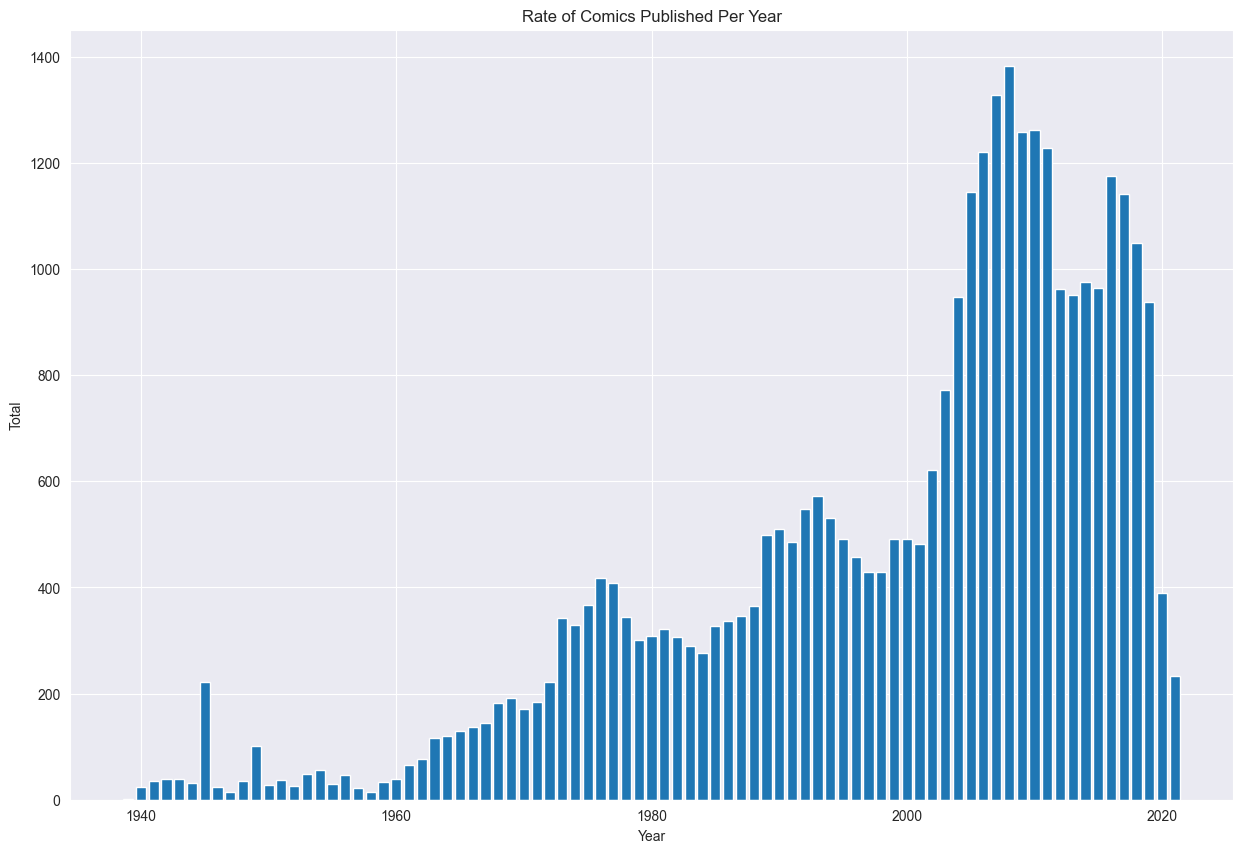

In [13]:
mask = new_df['year'].notnull()
rate = new_df[mask].copy()
rate['year'] = pd.to_numeric(rate['year'], errors='coerce')
rate = rate.groupby(['year']).count()
rate = rate.reset_index()
plt.figure(figsize=(15,10))
plt.bar(x='year', height='issue_title', data=rate)
plt.title('Rate of Comics Published Per Year')
plt.ylabel('Total')
plt.xlabel('Year');

I've also included a horizontal bar graph with different variations of color

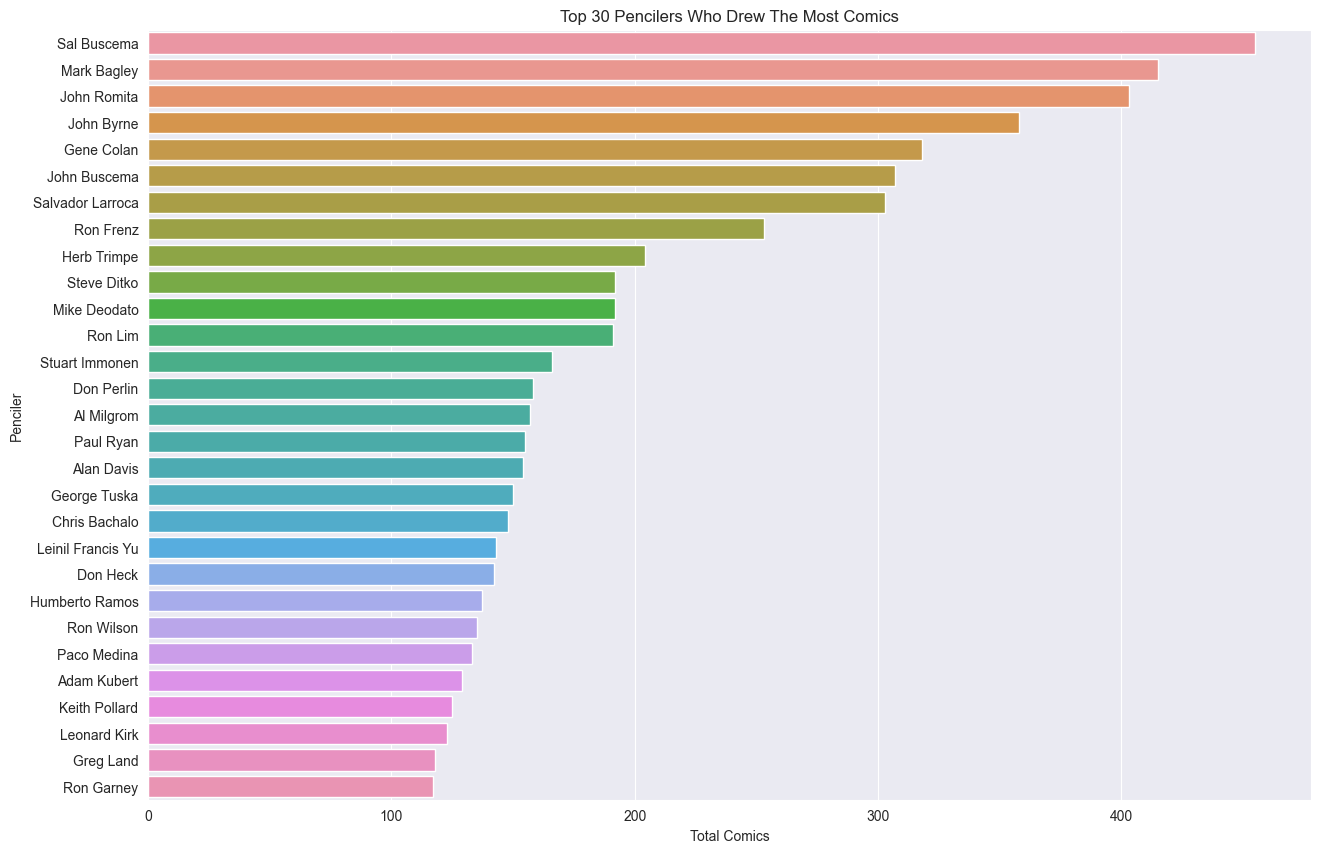

In [14]:
def parse_column(column):
    column = column.str.split(',')

    series = list()
    for index, value in column.items():
        series.append(value)

    words = list()
    counts = dict()
    for obj in series:
        for word in obj:
            word = str(word).lstrip()
            words.append(word)

    for word in words:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1
    counts_items = counts.items()
    data_list = list(counts_items)
    new_df = pd.DataFrame(data_list)
    new_df = new_df.rename({0: column.name, 1: 'total'}, axis=1)
    new_df = new_df.sort_values(by=['total'], ascending=False)
    new_df = new_df.reset_index(drop=True)
    return new_df
mask = new_df['penciler'].notnull()
penciler_df = new_df['penciler'][mask]
penciler = parse_column(penciler_df)
plt.figure(figsize=(15,10))
sns.barplot(x='total', y='penciler', data=penciler[1:30])
plt.title('Top 30 Pencilers Who Drew The Most Comics')
plt.ylabel('Penciler')
plt.xlabel('Total Comics');

From here, write the code to present in a scatter plot

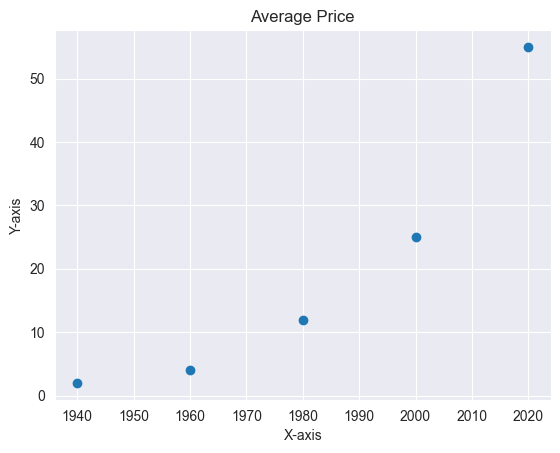

In [15]:
x = [1940, 1960, 1980, 2000, 2020]  # x-coordinates
y = [1.99, 3.99, 11.99, 24.99, 54.99]  # y-coordinates


plt.scatter(x, y)


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Average Price')


plt.show()

Write a code to showcase a timeline using a line graph

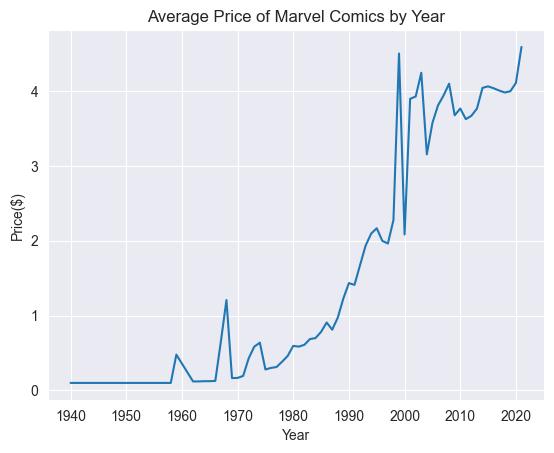

In [16]:

df[['date', 'year']] = df['publish_date'].str.split(', ', expand=True)


new_df = df.drop(['active_years', 'publish_date'], axis=1)


mask = (new_df['year'] == '-0001') | (new_df['year'] == '2029')
new_df['year'][mask] = df['issue_title'][mask]
new_df[['delete', 'year2']] = new_df['year'][mask].str.split('(', expand=True)
new_df[['year3', 'delete']] = new_df['year2'][mask].str.split(')', expand=True)
new_df['year'][mask] = new_df['year3'][mask]
new_df = new_df.drop(['delete', 'year2', 'year3'], axis=1)


mask = (new_df['year'] == 'Hardcover') | (new_df['year'].isna()) | (new_df['year'] == 'Digest') | (new_df['year'] == 'Trade Paperback')
new_df['year'][mask] = np.nan


new_df['Price'][new_df['Price'] == ' Free'] = ' $Free'
new_df['Price'][new_df['Price'] == 'None'] = np.nan


new_df[['sign', 'price($)']] = new_df['Price'].str.split('$', expand=True)
new_df = new_df.drop(['Price', 'sign'], axis=1)

new_df['year'] = pd.to_numeric(new_df['year'], errors='coerce')
new_df['price($)'] = pd.to_numeric(new_df['price($)'], errors='coerce')


new_df = new_df.dropna(subset=['year', 'price($)'])


agg_data = new_df.groupby('year')['price($)'].mean()


plt.plot(agg_data.index, agg_data.values)

plt.xlabel('Year')
plt.ylabel('Price($)')
plt.title('Average Price of Marvel Comics by Year')

plt.show()


Finally, input the code to make a 3D generated of the data

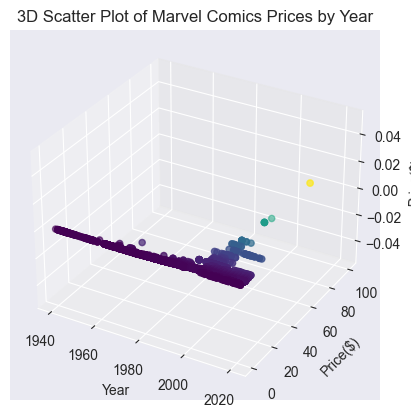

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


filtered_df = new_df.dropna(subset=['year', 'price($)'])


filtered_df['year'] = pd.to_numeric(filtered_df['year'], errors='coerce')


fig = plt.figure()
ax = plt.axes(projection='3d')


ax.scatter3D(filtered_df['year'], filtered_df['price($)'], c=filtered_df['price($)'], cmap='viridis')


ax.set_xlabel('Year')
ax.set_ylabel('Price($)')
ax.set_zlabel('Price($)')
plt.title('3D Scatter Plot of Marvel Comics Prices by Year')


plt.show()


Additionally, you can write a code to make the 3D plot interactive

In [18]:
import plotly.graph_objects as go


filtered_df = new_df.dropna(subset=['year', 'price($)'])


filtered_df['year'] = pd.to_numeric(filtered_df['year'], errors='coerce')


fig = go.Figure(data=go.Scatter3d(
    x=filtered_df['year'],
    y=filtered_df['price($)'],
    z=filtered_df['price($)'],
    mode='markers',
    marker=dict(
        size=5,
        color=filtered_df['price($)'],
        colorscale='Viridis',
        opacity=0.8
    )
))


fig.update_layout(
    scene=dict(
        xaxis_title='Year',
        yaxis_title='Price($)',
        zaxis_title='Price($)'
    ),
    title='3D Scatter Plot of Marvel Comics Prices by Year'
)


fig.show()


Blanco, Franco Angelo B.
2022105111

The distribution of Marvel Comics pricing over time is the observed trend in the 3D scatter plot depiction. We can learn more about the evolution of prices by graphing the relationship between the 'Year' and 'Price($)' variables. The viewer can rotate and zoom in/out to observe the data from various angles thanks to the animation or user interaction in the plot. Users are able to closely study the data points in the 3D area thanks to this function, which offers a dynamic and interesting experience. The distribution patterns, any clusters or outliers, and potential trends or relationships between the data can all be better understood. 